## Introduction 

This analysis focuses on the number of COVID-19 clinical trials that have been registered on https://clinicaltrials.gov/. In order to effectively evaluate the data, it is useful to be familiar with what the ClinicalTrials.gov is and some common clinical trial terminology.

What is ClinicalTrials.gov?

It is a database developed by U.S. National Library of Medicine, hosting information of private and public funded clinical trials. 

`Clinical Trial Terminology from the clinicaltrials.gov`

| Term       | Definition                                                 |
|------------|------------------------------------------------------------|
| Clinical trial | A research study that involves human participants to evaluate a medical treatment or procedure. |
| Placebo      | A harmless substance that looks and tastes like a medication, but does not contain any active ingredients. |
| Double-blind | A type of study design in which neither the participants nor the researchers know which participants are receiving the treatment or the placebo. |
| Phase 2 | A phase of clinical research where preliminary data on whether a drug works in people who have a certain condiction/disease.In this phase, the participants receiving the intervention are compared to those receiving a placebo to determine the drug's effectiveness.|
| Phase 3| A phase where the drug's safety is studied in different populations and different dosages and the drug in combination with other drugs. The number of participants in Phase 3 is larger than Phase 2.| 
| Phase 4 | This phase of research occurs after FDA approval on a drug.They include postmarket requirement and commitment studies that are required of or agreed to by the study sponsor.These trials gather additional information about a drug's safety, efficacy, or optimal use.|   
    
** Please note that the source of the datasets is Kaggle- https://www.kaggle.com/code/parulpandey/eda-on-covid-19-clinical-trials/data. 





`Analysis questions`: 

* How many clinical trials were conducted in each phase (2-4) where the condition was related to COVID?
* What phase completed the most covid clinical trials? 
* Who are the top three sponsors for clinical trials on COVID related conditions?


Per CDC, the COVID-19 outbreak started in USA on January 18, 2019. 
And the first clinical trial conducted for COVID-19 was on March 17, 2020 at The University of Minnesota. 

Source- https://www.cdc.gov/museum/timeline/covid19.html#:~:text=CDC%20reports%20the%20first%20laboratory,respond%20to%20the%20emerging%20outbreak.

#### Importing Necessary Libaries

In [1]:
!pip install ipython-sql

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


#### Reading in the data with Pandas

In [3]:
# Reading in the data
cct = pd.read_csv('COVID clinical trials.csv')

In [4]:
cct.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


#### Assessment of data quality issues 

In [5]:
cct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [6]:
cct.shape

(5783, 27)

In [7]:
# columns with null values 
cct_null = cct.columns[cct.isnull().any()]
cct_null

Index(['Acronym', 'Interventions', 'Outcome Measures', 'Gender', 'Phases',
       'Enrollment', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'Results First Posted',
       'Locations', 'Study Documents'],
      dtype='object')

In [8]:
#number of columns with null values
len(cct_null)

14

In [9]:
cct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [10]:
# Duplicated values in the cct dataframe if any
cct.duplicated().sum()

0

In [11]:
# Visual Assessment 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
cct.sample(5)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
4109,4110,NCT04414657,USZ BioResource COVID,NaN,Recruiting,No Results Available,COVID19,Other: blood sampling for biobank,blood sampling for biobank,Regina Grossmann|University of Zurich,All,"18 Years and older (Adult, Older Adult)",NaN,500.0,Other,Observational,Observational Model: Cohort|Time Perspective: Prospective,CTC HFV2,"April 9, 2020","April 30, 2022","April 30, 2022","June 4, 2020",NaN,"June 4, 2020","University Hospital Zurich, Clinical Trials Center, Zurich, Switzerland",NaN,https://ClinicalTrials.gov/show/NCT04414657
5524,5525,NCT04136340,Supportive Care Delivered by Telemedicine to Cancer Patients at Home,NaN,Recruiting,No Results Available,Cancer|Supportive Care,Other: In-person in clinic follow-up visit|Other: Telemedicine follow-up visit,Health-Related Quality of Life: FACT-G,Memorial Sloan Kettering Cancer Center,All,"18 Years and older (Adult, Older Adult)",Not Applicable,466.0,Other,Interventional,Allocation: Randomized|Intervention Model: Parallel Assignment|Masking: None (Open Label)|Primary Purpose: Supportive Care,19-382,"October 24, 2019",October 2021,October 2021,"October 23, 2019",NaN,"July 2, 2020","Memorial Sloan Kettering Cancer Center, New York, New York, United States",NaN,https://ClinicalTrials.gov/show/NCT04136340
4619,4620,NCT04797936,BNO 1030 Extract (Imupret) in the Treatment of Mild Forms of COVID-19,NaN,Completed,No Results Available,Covid19|Nasopharyngitis|Anosmia|Fever|Myalgia|Cough|Nasal Congestion,Drug: BNO 1030|Other: Standard care,"Day of response to treatment from baseline to end of treatment (up to two weeks) - decrease in the average score of the symptom assessed by the patient (VAS, 0-10 points for each symptom) by 50% compared to baseline.|Symptom Dynamics (assessed by patients)",Ivano-Frankivsk National Medical University,All,"18 Years to 70 Years (Adult, Older Adult)",Phase 4,133.0,Other,Interventional,Allocation: Randomized|Intervention Model: Parallel Assignment|Masking: None (Open Label)|Primary Purpose: Treatment,BERI_UA_IMU_2020_000003751,"May 1, 2020","December 19, 2020","January 8, 2021","March 15, 2021",NaN,"March 15, 2021","Ivano-Frankivsk National Medical University, Ivano-Frankivsk, Ukraine",NaN,https://ClinicalTrials.gov/show/NCT04797936
1087,1088,NCT04536285,Hospitalized Children and Adolescent Patients With Type 1 Diabetes During the COVID-19 Pandemic in Egypt,NaN,Completed,No Results Available,Type 1 Diabetes|Covid19,NaN,Clinical characteristic of pediatric and adolescent patients with type 1 diabetes hospitalized with COVID -19.|Laboratory characteristic of pediatric and adolescent patients with type 1 diabetes hospitalized with COVID -19.|Prognosis of pediatric and adolescent patients with type 1 diabetes hospitalized with COVID -19.|Incidence of new onset type 1 diabetes among confirmed cases of Covid-19 infection among children and adolescents|Presentation of diabetes and its acute complications among pediatric and adolescent patients with type 1 diabetes during COVID-19 Pandemic in Egypt,Ain Shams University,All,"1 Year to 18 Years (Child, Adult)",NaN,36.0,Other,Observational,Observational Model: Case-Only|Time Perspective: Cross-Sectional,FMASU P59/2020,"May 1, 2020","August 31, 2020","August 31, 2020","September 2, 2020",NaN,"September 2, 2020","Pediatrics and Adolescents Diabetes Unit (PADU), Pediatrics Hospital, Faculty of Medicine, Ain Shams University, Cairo, Egypt",NaN,https://ClinicalTrials.gov/show/NCT04536285
203,204,NCT04474483,Safety and Efficacy of Melatonin in Outpatients Infected With COVID-19,COVID-19,Recruiting,No Results Available,COVID-19,Drug: Melatonin|Other: Placebo (Methylcellulose) capsule,Cumulative Incidence of 

## `Data Quality Issues`

CCT DataFrame:

1. Completeness- Missing values in the following columns, the columns that are unecessary for this analysis are highlighted and can be dropped from cct df. The missing information in columns that are unhighlighted cannot be recovered therefore the rows with missing values will deleted in the copy of the dataframe. 

`Acronym`

Interventions

`Outcome Measures`

`Gender`

Phases

Enrollment

`Study Designs`

`Other IDs`

Start Date

Primary Completion Date

Completion Date 

Results First Posted

Locations

`Study Documents`

2. Validity: The datatypes of the following columns need to be datetime: Start Date, Completion Date.

## `Data Cleaning`

This section will describe the process of resolving data quality issues by defining the issue, outlining the cleaning method, coding the cleaning process, and testing to confirm that the issue has been resolved."

In [12]:
cct_copy = cct.copy()

In [13]:
cct_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

#### It is best practice to address the completeness issue of a dataframe. 

`Define`

Dropping the following columns by capturing all series in a list and then passing them thru a df.drop(series, axis=0)function.

Acronym

Outcome Measures

Gender

Study Designs

Other IDs

Study Documents

In [14]:
cct_copy.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19 Screening Test Versus Simplexa™ COVID-19 Direct Assay,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID Now ™ COVID-19 test carried out by nurses in an emergency department in comparison with the reference PCR test: Simplexa ™ COVID-19 Direct,Groupe Hospitalier Paris Saint Joseph,All,"18 Years and older (Adult, Older Adult)",Not Applicable,1000.0,Other,Interventional,Allocation: N/A|Intervention Model: Single Group Assignment|Masking: None (Open Label)|Primary Purpose: Diagnostic,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, Ile De France, France",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001-USR in Patients With Mild/or Moderate COVID-19 Infection in Outpatient,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline after using COVID19-0001-USR via nebulization,United Medical Specialties,All,"18 Years and older (Adult, Older Adult)",Phase 1|Phase 2,60.0,Other,Interventional,"Allocation: Randomized|Intervention Model: Parallel Assignment|Masking: Triple (Participant, Care Provider, Investigator)|Primary Purpose: Treatment",COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lung Injury,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung damage induced by COVID-19|A quantitative analysis of parenchymal lung damage induced by COVID-19|The potential impact of parenchymal morphological CT scans in patients with severe moderate respiratory failure.|Automated segmentation of lung scans of patients with COVID-19 and ARDS.|Knowledge of chest CT features in COVID-19 patients and their detail through the use of machine learning and other quantitative techniques.|The ability within which the analysis of artificial intelligence that uses deep learning models can be used to predict clinical outcomes,University of Milano Bicocca,All,"18 Years and older (Adult, Older Adult)",NaN,500.0,Other,Observational,Observational Model: Cohort|Time Perspective: Retrospective,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|Policlinico San Marco-San Donato group, Bergamo, Italy|Azienda Ospedaliero-Universitaria di Ferrara, Ferrara, Italy|ASST di Lecco Ospedale Alessandro Manzoni, Lecco, Italy|ASST Melegnano-Martesana, Ospedale Santa Maria delle Stelle, Melzo, Italy|ASST Monza, Monza, Italy|AUSL Romagna-Ospedale Infermi di Rimini, Rimini, Italy|Istituto per la Sicurezza Sociale-Ospedale della Repubblica di San Marino, San Marino, San Marino",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Amid COVID-19 Pandemic,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion of subjects with recent contact history|Proportion of subjects with recent travel history,Hong Kong Sanatorium & Hospital,All,"Child, Adult, Older Adult",NaN,2500.0,Industry,Observation

`Code`

In [15]:
cct_copy.drop(columns=['Acronym', 'Outcome Measures', 'Gender', 'Study Designs', 'Other IDs', 'Study Documents' ], inplace=True)

`Test`

In [16]:
cct_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Status                   5783 non-null   object 
 4   Study Results            5783 non-null   object 
 5   Conditions               5783 non-null   object 
 6   Interventions            4897 non-null   object 
 7   Sponsor/Collaborators    5783 non-null   object 
 8   Age                      5783 non-null   object 
 9   Phases                   3322 non-null   object 
 10  Enrollment               5749 non-null   float64
 11  Funded Bys               5783 non-null   object 
 12  Study Type               5783 non-null   object 
 13  Start Date               5749 non-null   object 
 14  Primary Completion Date 

`Define`: Change the datetype of the `Start Date and Completion Date` to datetime by using pd.to_datetime. 

In [17]:
cct_copy[['Start Date', 'Completion Date']] = cct_copy[['Start Date', 'Completion Date']].apply(pd.to_datetime)


In [18]:
cct_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Rank                     5783 non-null   int64         
 1   NCT Number               5783 non-null   object        
 2   Title                    5783 non-null   object        
 3   Status                   5783 non-null   object        
 4   Study Results            5783 non-null   object        
 5   Conditions               5783 non-null   object        
 6   Interventions            4897 non-null   object        
 7   Sponsor/Collaborators    5783 non-null   object        
 8   Age                      5783 non-null   object        
 9   Phases                   3322 non-null   object        
 10  Enrollment               5749 non-null   float64       
 11  Funded Bys               5783 non-null   object        
 12  Study Type               5783 non-

### How many covid related clinical trials were completed in each of the phases (2-4)?

In [19]:
#create a new dataframe of non null values in the phases column

cct_phases = cct_copy[(cct_copy['Phases'].notnull()) & (cct_copy['Phases'] != 'Not Applicable')]

In [20]:
cct_phases.head()

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Sponsor/Collaborators,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,URL
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001-USR in Patients With Mild/or Moderate COVID-19 Infection in Outpatient,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,United Medical Specialties,"18 Years and older (Adult, Older Adult)",Phase 1|Phase 2,60.0,Other,Interventional,2020-11-02,"December 15, 2020",2021-01-29,"October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",https://ClinicalTrials.gov/show/NCT04595136
5,6,NCT04516954,Convalescent Plasma for COVID-19 Patients,Enrolling by invitation,No Results Available,COVID 19,Biological: Convalescent COVID 19 Plasma,"Vinmec Research Institute of Stem Cell and Gene Technology|National Institute of Hygiene and Epidemiology, Vietnam|National Hospital for Tropical Diseases, Hanoi, Vietnam|National Institute of Hematology and Blood Transfusion, Vietnam","18 Years to 75 Years (Adult, Older Adult)",Early Phase 1,10.0,Other,Interventional,2020-08-01,"November 30, 2020",2020-12-30,"August 18, 2020",NaN,"August 20, 2020","Vinmec Research Institute of Stem cell and Gene Technology, Hanoi, Vietnam",https://ClinicalTrials.gov/show/NCT04516954
9,10,NCT04384588,COVID19-Convalescent Plasma for Treating Patients With Active Symptomatic COVID 19 Infection (FALP-COVID),Recruiting,No Results Available,COVID-19 Infection|Cancer Patients|General Population,Biological: Convalescent Plasma from COVID-19 donors,Fundacion Arturo Lopez Perez|Confederación de la Producción y del Comercio (CPC)|Bolsa de Santiago,"15 Years and older (Child, Adult, Older Adult)",Phase 2|Phase 3,100.0,Other,Interventional,2020-04-07,"April 6, 2021",2021-04-06,"May 12, 2020",NaN,"May 12, 2020","Fundacion Arturo Lopez Perez, Providencia, Santiago, Chile",https://ClinicalTrials.gov/show/NCT04384588
10,11,NCT04355897,CoVID-19 Plasma in Treatment of COVID-19 Patients,Recruiting,No Results Available,COVID 19,Biological: Convalescent COVID 19 Plasma,The Christ Hospital,"18 Years to 80 Years (Adult, Older Adult)",Early Phase 1,100.0,Other,Interventional,2020-04-28,July 2020,2020-08-01,"April 21, 2020",NaN,"May 20, 2020","The Christ Hospital, Cincinnati, Ohio, United States|University Hospitals Cleveland Medical Center, Cleveland, Ohio, United States",https://ClinicalTrials.gov/show/NCT04355897
21,22,NCT04473170,Study Evaluating the Safety and Efficacy of Autologous Non-Hematopoietic Peripheral Blood Stem Cells in COVID-19,Completed,No Results Available,Coronavirus Disease 2019 (COVID-19),Biological: Autologous Non-Hematopoietic Peripheral Blood Stem Cells (NHPBSC)|Drug: COVID-19 standard care,Abu Dhabi Stem Cells Center,"18 Years and older (Adult, Older Adult)",Phase 1|Phase 2,146.0,Other,Interventional,2020-04-04,"May 20, 2020",2020-07-14,"July 16, 2020",NaN,"July 16, 2020","Abu Dhabi Stem Cells Center, Abu Dhabi, United Arab Emirates",https://ClinicalTrials.gov/show/NCT04473170


In [21]:
cct_phases['Phases'].value_counts()

Phase 2            685
Phase 3            450
Phase 1            234
Phase 2|Phase 3    200
Phase 1|Phase 2    192
Phase 4            161
Early Phase 1       46
Name: Phases, dtype: int64

In [22]:
cct_phases['Status'].value_counts()

Recruiting                 934
Not yet recruiting         372
Active, not recruiting     240
Completed                  234
Withdrawn                   77
Terminated                  57
Enrolling by invitation     31
Suspended                   23
Name: Status, dtype: int64

In [23]:
cct_phases = cct_phases[cct_phases['Status'] == 'Completed']

In [24]:
cct_phases

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Sponsor/Collaborators,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,URL
21,22,NCT04473170,Study Evaluating the Safety and Efficacy of Autologous Non-Hematopoietic Peripheral Blood Stem Cells in COVID-19,Completed,No Results Available,Coronavirus Disease 2019 (COVID-19),Biological: Autologous Non-Hematopoietic Peripheral Blood Stem Cells (NHPBSC)|Drug: COVID-19 standard care,Abu Dhabi Stem Cells Center,"18 Years and older (Adult, Older Adult)",Phase 1|Phase 2,146.0,Other,Interventional,2020-04-04,"May 20, 2020",2020-07-14,"July 16, 2020",NaN,"July 16, 2020","Abu Dhabi Stem Cells Center, Abu Dhabi, United Arab Emirates",https://ClinicalTrials.gov/show/NCT04473170
108,109,NCT04332380,Convalescent Plasma for Patients With COVID-19: A Pilot Study,Completed,No Results Available,Coronavirus|Coronavirus Infection,Drug: Plasma,Universidad del Rosario|CES University|Instituto Distrital de Ciencia Biotecnologia e Innovacion en salud|Fundación Universitaria de Ciencias de la Salud,18 Years to 60 Years (Adult),Phase 2,10.0,Other,Interventional,2020-05-01,"July 28, 2020",2020-07-28,"April 2, 2020",NaN,"August 17, 2020","Universidad del Rosario, Bogota, Cundinamarca, Colombia",https://ClinicalTrials.gov/show/NCT04332380
116,117,NCT04332835,"Convalescent Plasma for Patients With COVID-19: A Randomized, Single Blinded, Parallel, Controlled Clinical Study",Completed,No Results Available,Coronavirus|Coronavirus Infection,Drug: Plasma|Drug: Standard Therapy,Universidad del Rosario|Fundación Universitaria de Ciencias de la Salud|CES University|Instituto Distrital de Ciencia Biotecnología e Innovacion en Salud,"18 Years to 100 Years (Adult, Older Adult)",Phase 2|Phase 3,92.0,Other,Interventional,2020-08-08,"October 31, 2020",2020-11-15,"April 3, 2020",NaN,"November 27, 2020","Universidad del Rosario, Bogota, Cundinamarca, Colombia",https://ClinicalTrials.gov/show/NCT04332835
151,152,NCT04331834,Pre-Exposure Prophylaxis With Hydroxychloroquine for High-Risk Healthcare Workers During the COVID-19 Pandemic,Completed,No Results Available,COVID-19,Drug: Hydroxychloroquine|Drug: Placebos,Barcelona Institute for Global Health|Hospital Clinic of Barcelona|Laboratorios Rubió|Fundació Institut de Recerca de l'Hospital de la Santa Creu i Sant Pau|Hospital Plató|Hospital de Granollers,"18 Years and older (Adult, Older Adult)",Phase 3,275.0,Other,Interventional,2020-04-03,"June 25, 2020",2020-12-31,"April 2, 2020",NaN,"February 16, 2021","ISGlobal, Barcelona, Spain",https://ClinicalTrials.gov/show/NCT04331834
165,166,NCT04375098,Efficacy and Safety of Early COVID-19 Convalescent Plasma in Patients Admitted for COVID-19 Infection,Completed,No Results Available,Severe Acute Respiratory Syndrome Coronavirus 2,Biological: COVID-19 convalescent plasma,Pontificia Universidad Catolica de Chile|Fundacion Arturo Lopez Perez,"18 Years and older (Adult, Older Adult)",Phase 2,58.0,Other,Interventional,2020-05-04,"August 17, 2020",2020-08-17,"May 5, 2020",NaN,"September 16, 2020","Hospital Clínico Universidad Católica, Santiago, Chile",https://ClinicalTrials.gov/show/NCT04375098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668,5669,NCT04400682,"Bioequivalence Study of Favipiravir 200 mg Film Tablet (Novelfarma, Turkey) Under Fasting Conditions",Completed,Has Results,Bioequivalence,Drug: FAVIRA 200 MG Film Tablet|Drug: AVIGAN 200 MG Film Tablets,Novelfarma Ilaç San. ve Tic. Ltd. Sti.|Novagenix Bioanalytical Drug R&D Center|Farmagen Ar-Ge Biyot. Ltd. Sti,20 Years to 40 Years (Adult),Phase 1,30.0,Industry|Other,Interventional,2020-05-28,"June 5, 2020",2020-06-18,"May 22, 2020","August 11, 2020","August 11, 2020","Novagenix Drug R&D Center, Akyurt, Ankara, Turkey|Farmagen Ar-Ge Biyot. Ltd. Sti., Sahinbey, Gaziantep, Turkey",https://ClinicalTrials.gov/show/N

### What is the time frame of this dataset?


In [25]:
cct_phases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 21 to 5743
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Rank                     234 non-null    int64         
 1   NCT Number               234 non-null    object        
 2   Title                    234 non-null    object        
 3   Status                   234 non-null    object        
 4   Study Results            234 non-null    object        
 5   Conditions               234 non-null    object        
 6   Interventions            234 non-null    object        
 7   Sponsor/Collaborators    234 non-null    object        
 8   Age                      234 non-null    object        
 9   Phases                   234 non-null    object        
 10  Enrollment               234 non-null    float64       
 11  Funded Bys               234 non-null    object        
 12  Study Type               234 non-n

In [26]:
cct_phases['Start Year'] = cct_phases['Start Date'].dt.year

In [27]:
cct_phases['Completion Year'] = cct_phases['Completion Date'].dt.year

In [28]:
result = cct_phases[['Start Year', 'Completion Year']].agg(['min', 'max'])
result

,Start Year,Completion Year
min,2013,2018
max,2021,2021


#### The clinical trials in this dataset started in 2013 and some ended in 2021. The dataframe needs to be analyzed further because it does not only contain covid related clinical trials since covid pandemic occured in 2019. 

In [29]:
pd.set_option('display.max_rows', None)
cct_phases['Conditions'].value_counts()

##filter dataframe to include terms such as COVID-19, COVID, Corona Virus Infection, Coronavirus, COVID19,COVID 19, Covid19

COVID-19                                                                                                                          60
Covid19                                                                                                                           22
COVID                                                                                                                              6
Corona Virus Infection                                                                                                             6
Bioequivalence                                                                                                                     5
COVID-19 Pneumonia                                                                                                                 5
Severe Acute Respiratory Syndrome Coronavirus 2                                                                                    4
Covid-19                                                             

In [30]:
cct_phases['Conditions'] = cct_phases['Conditions'].str.replace(r'COVID(-|\s)?(19|\s19)?|Corona(virus)?(\sVirus)?\sInfection', 'COVID-19',regex=True, case=False)


Using a regular expression can be challenging so here is a breakdown of the above regex (COVID(-|\s)?(19|\s19)?|Corona(virus)?(\sVirus)?\sInfection):

The variations of the word coronavirus in the conditions column:

COVID-19, COVID, Corona Virus Infection, Coronavirus, COVID19,COVID 19, Covid19

COVID(-|\s)?(19|\s19)?|Corona(virus)?(\sVirus)?\sInfection

    COVID: matches the exact characters "COVID".

    (-|\s)?: Matches either a hypen or a space character, optionally (0 or 1 times) to match COVID 19 or COVID-19.
    
    (19|\s19)?: Matches either the number 19 or a space character followed by the number 19, again matching COVID 19  or COVID-19.
    
    |: This vertical bar separates the alternative search patterns. 
    
    Corona: Matches the exact characters "Corona".
    
    (virus)?: Matches the string "virus", optionally.
    
    (\sVirus)?: Matches a space character followed by the string "Virus", optionally (0 or 1 times).
    
    \sInfection: Matches a space character followed by the exact characters "Infection".

In [31]:
cct_phases['Conditions'].value_counts()

COVID-19                                                                                                            104
COVID-19 Pneumonia                                                                                                    5
Bioequivalence                                                                                                        5
Severe Acute Respiratory Syndrome Coronavirus 2                                                                       4
Coronavirus Disease 2019 (COVID-19)                                                                                   3
Coronavirus                                                                                                           3
COVID-19|SARS (Severe Acute Respiratory Syndrome)                                                                     2
COVID-19|Sars-CoV2                                                                                                    2
SARS-CoV Infection|Severe Acute Respirat

### What phase completed the most covid clinical trials? 

In [32]:
s = cct_phases['Phases'].value_counts()

In [33]:
cct_phases_df = s.to_frame()

In [34]:
cct_phases_df.reset_index().rename(columns={'index': 'Phases', 'Phases':'Number of Trials'})


,Phases,Number of Trials
0,Phase 2,78
1,Phase 3,56
2,Phase 1,38
3,Phase 4,22
4,Phase 2|Phase 3,20
5,Phase 1|Phase 2,17
6,Early Phase 1,3


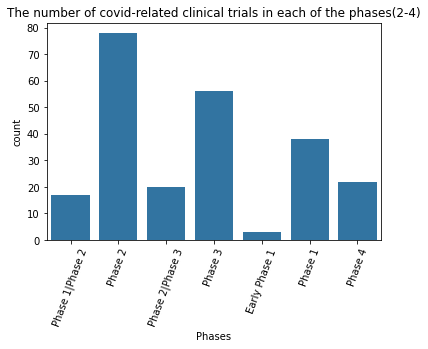

In [35]:
base_color = sb.color_palette()[0]

sb.countplot(data=cct_phases, x='Phases', color=base_color)
plt.xticks(rotation=70)
plt.title('The number of covid-related clinical trials in each of the phases(2-4)');

The highest number of clinical trials of COVID completed were in Phase 2, where the participants receiving the intervention are compared to those receiving a placebo to determine the drug's effectiveness. 

#### What types of interventions were tested in clinical trials that completed Phase 2? 

In [36]:
cct_phases['Study Type'].value_counts()

Interventional    234
Name: Study Type, dtype: int64

All COVID related clinical trials marked completed are interventional study type. An interventional study type in clinical trial is when participants are randomly assigned to receive an intervention or treatment in order to evaluate its effects. The aim of this study type is to determine the efficacy and safety of the intervention being studied. 

Interventional studies are also known as randomized controlled trials (RCTs), the gold standard in clinical research. In an RCT, particpants are randomly assigned to either the treatment group or the control group. The treatment group receives the drug being tested and the control group received the placebo or standard treatment. Then the results of the two groups are compared to determine the effectiveness of the intervention. Interventional studies help to make sure that the new treatments are safe and effective before they are released to the public. 

### What are the top three sponsors?

In [37]:
sponsor_counts = cct_phases['Sponsor/Collaborators'].value_counts()

In [38]:
sponsor_counts_df = sponsor_counts.to_frame()
sponsor_counts_df

,Sponsor/Collaborators
National Institute of Allergy and Infectious Diseases (NIAID),4
Novartis Pharmaceuticals|Novartis,3
Gilead Sciences,3
Fundação de Medicina Tropical Dr. Heitor Vieira Dourado,2
"Ridgeback Biotherapeutics, LP",2
"Instituto Grifols, S.A.|Grifols Therapeutics LLC",2
Burnasyan Federal Medical Biophysical Center,2
Emory University,2
Brii Biosciences Limited|TSB Therapeutics (Beijing) CO.LTD,2
University of Chicago,2


The top three sponsors that conducted the highest number of COVID-related trials are:

National Intitute of Allergy and Infectious Diseases (NIAID)
Novartis Pharmaceuticals
Fundacao de Medicina Tropical Dr. Heitor Vieira Dourado
Chronic Obstructive Pulmonary Disease Trial Network, Denmark
